<a href="https://colab.research.google.com/github/A01302935/Computo_En_La_Nuve_A01302935/blob/main/Avance4_19Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

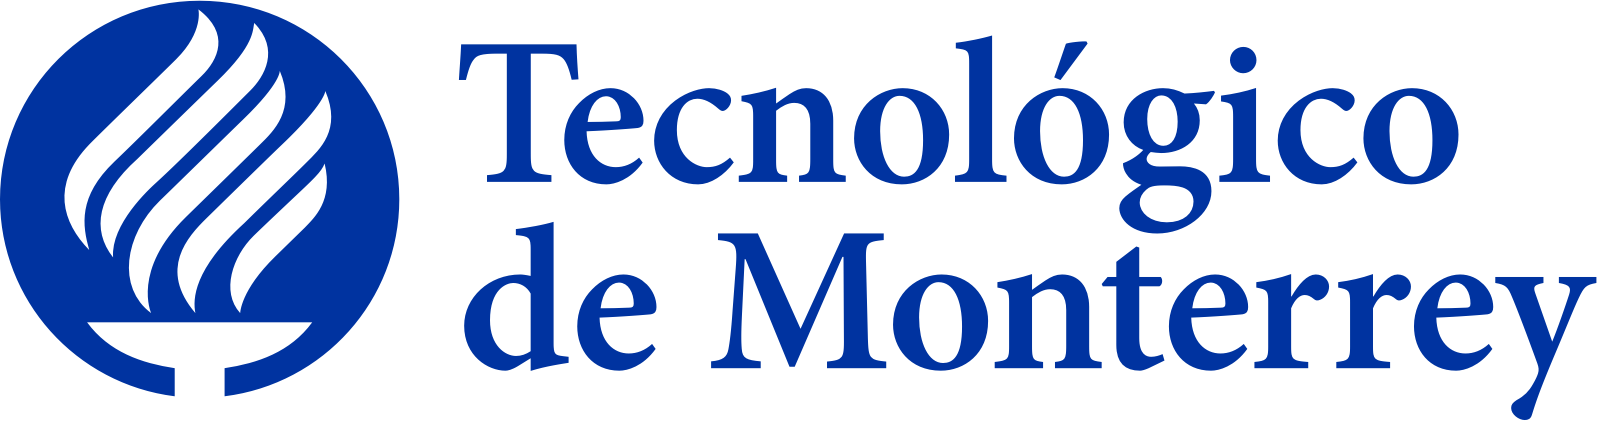
## Proyecto Integrador (Grupo 10)
## Avance 4. Modelos Alternativos
## Equipo 19
### Alumnos:

- **[A01302935]**  David Mireles Samaniego
- **[A00618978]**  Angel Rodríguez Cardenas



### **OBJETIVOS**
4.0 Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.

4.1 Comparar el rendimiento de los modelos obtenidos.

4.2 Seleccionar los dos modelos que proporcionen el mejor rendimiento.

4.3 Ajustar los dos mejores modelos.

4.4 Elegir el modelo individual final.

In [ ]:
#,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,

### **INSTRUCCIONES**

Este avance implica construir múltiples modelos (individuales, no ensambles) relevantes para resolver el problema y evaluar su desempeño. Diferentes algoritmos pueden comportarse de manera óptima en diferentes tipos de datos o tareas. La construcción de modelos alternativos permite explorar y evaluar cuál de ellos proporciona el mejor rendimiento para un problema particular.

Además, los modelos se pueden ajustar para determinar si se puede mejorar su rendimiento. Diferentes configuraciones de hiperparámetros pueden afectar significativamente el rendimiento de un modelo. Construir modelos alternativos implica explorar y ajustar estos hiperparámetros para encontrar la configuración óptima.

# **4.0 Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.**

Al trabajar con el conjunto de datos ejemplo como Olivetti Faces, el objetivo principal es identificar a las personas en las imágenes, lo que constituye un problema de clasificación de imágenes. Para abordar este problema de manera efectiva, se probaron seis modelos representativos de diferentes enfoques en Machine Learning y Deep Learning.

Estos modelos fueron seleccionados estratégicamente para abarcar diversas técnicas de clasificación, desde métodos estadísticos hasta algoritmos de aprendizaje profundo.

Los modelos seleccionados son

**-Gradient Boosting Machines (GBM)**

**-Clasificador Bayesiano Ingenuo (Naive Bayes)**

**-Redes Neuronales Artificiales (ANN)**

**-Redes Neuronales Convolucionales (CNN)**

**-Análisis de Discriminante Lineal (LDA)**

**-Análisis de Componentes Principales (PCA+ SVM)**

# **Instalanto Componentes**
**Instalando Biblioteca**

In [ ]:
pip install numpy scikit-learn matplotlib


**Importamos Librerias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# **Cargar Base De Datos y visualizacion previa**

In [ ]:
#cargar olivietti faces y mostrar datos#
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.images  # Imágenes con forma (400, 64, 64)
y = olivetti_faces.target  # Etiquetas con forma (400,)

# Imprimir las formas de X e y
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (400, 64, 64)
Shape de y: (400,)


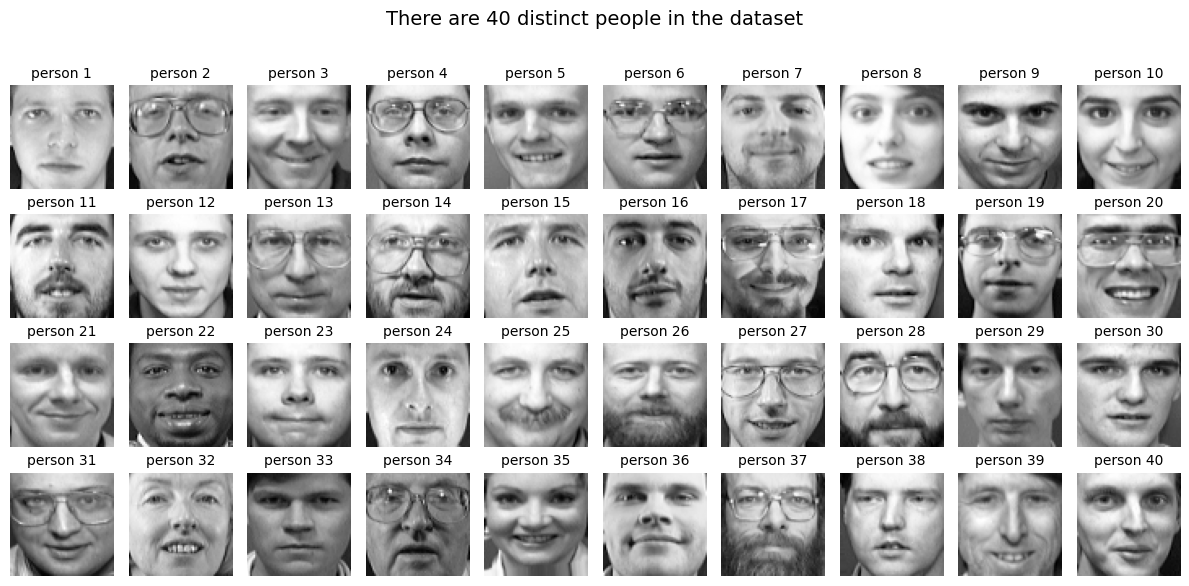

In [ ]:
# Mostrar las imágenes para corroborar datos#
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(12, 6))
fig.suptitle("There are 40 distinct people in the dataset", fontsize=14)

# Iterar sobre cada una de las 40 personas, datos que obtuvimos del avance 3#
for i in range(40):
    ax = axes[i // 10, i % 10]
    ax.imshow(X[y == i][0], cmap='gray')
    ax.set_title(f"person {i+1}", fontsize=10)
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar diseño
plt.show()

# **4.1 Comparar el rendimiento de los modelos obtenidos**.

**Modelo 1:Gradient Boosting Classifier (GBM)**

**¿Qué es?** GBM es un método de ensamble que construye modelos de forma secuencial, donde cada modelo intenta corregir los errores del anterior.

**¿Por qué este modelo?**
GBM es potente para clasificación y adecuado cuando las relaciones entre los datos no son completamente lineales. Puede manejar datos tabulares de alta dimensionalidad como los vectores de píxeles de las imágenes de rostros.


Accuracy: 0.5250
Precision: 0.5802
Recall: 0.5250
F1-score: 0.5237
Training Time: 24.50 segundos


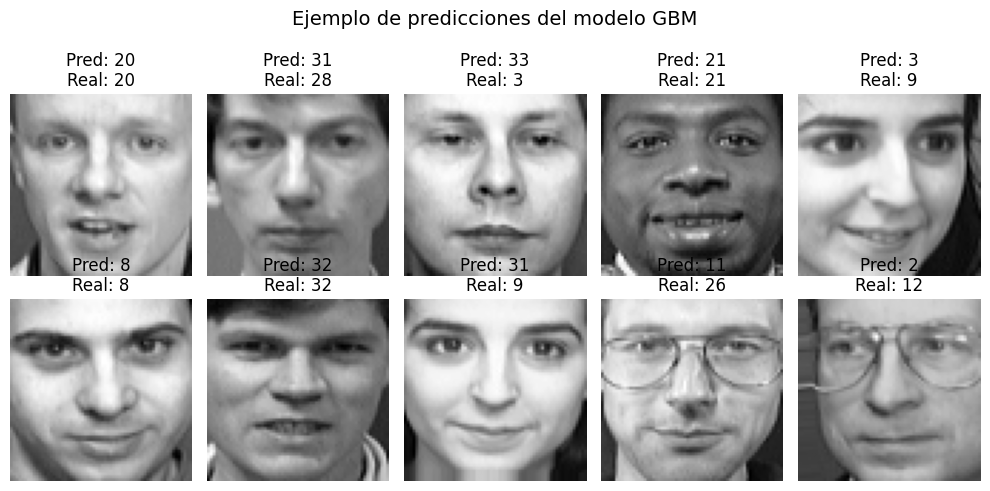

In [ ]:
#Carga de Datos y Preprocesamiento"
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar dataset Olivetti Faces
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.images.reshape(400, -1)  # Convertir imágenes 64x64 a vectores de 4096 píxeles
y = olivetti_faces.target  # Etiquetas

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducir dimensionalidad con PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Inicializar y entrenar el modelo GBM optimizado porque tarda mucho
gbm = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42)

start_time = time.time()
gbm.fit(X_train_pca, y_train)
end_time = time.time()

y_pred = gbm.predict(X_test_pca)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
training_time = end_time - start_time

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} segundos")

# Mostrar algunas predicciones
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
fig.suptitle("Ejemplo de predicciones del modelo GBM", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}\nReal: {y_test[i]}")
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Modelo 2:Clasificador Bayesiano Ingenuo (Naive Bayes):**

**¿Qué es?**
Naive Bayes es un clasificador probabilístico basado en el Teorema de Bayes, el cual calcula la probabilidad de que una instancia pertenezca a una clase dada la información de sus características. Suponiendo independencia condicional entre las características (razón por la que se llama "ingenuo" o naive), el modelo calcula la probabilidad conjunta y asigna la clase con la mayor probabilidad.

**¿Porqué este modelo?**
Naive Bayes puede ser un buen modelo base para comparación, ya que ofrece una solución rápida y simple para clasificación de imágenes

Accuracy: 0.8375
Precision: 0.8503
Recall: 0.8375
F1-score: 0.8218
Training Time: 0.02 segundos


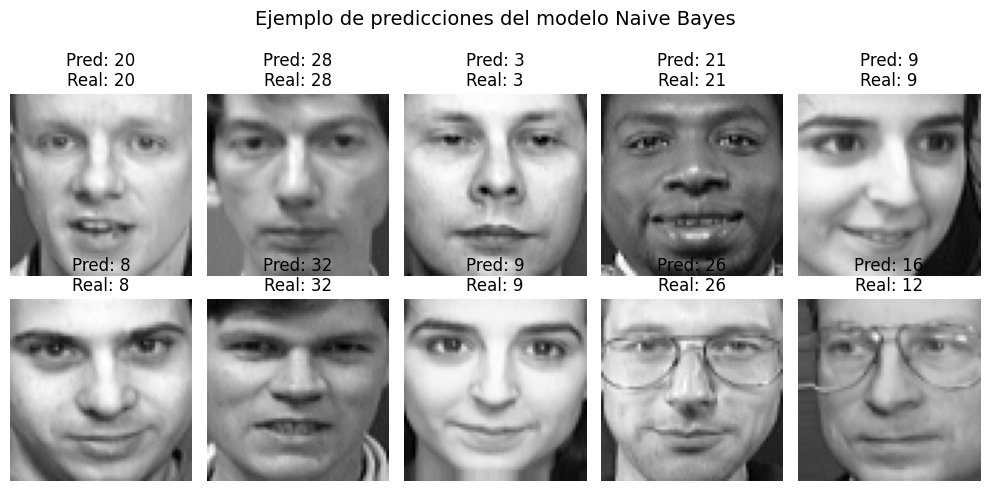

In [ ]:
#Carga de Datos y Preprocesamiento"
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar dataset Olivetti Faces
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.images.reshape(400, -1)
y = olivetti_faces.target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Naive Bayes
nb = GaussianNB()

start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()

# Hacer predicciones
y_pred = nb.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
training_time = end_time - start_time

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} segundos")

# Mostrar algunas predicciones
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
fig.suptitle("Ejemplo de predicciones del modelo Naive Bayes", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}\nReal: {y_test[i]}")
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Modelo 3:Red Neuronal Artificial (ANN):**

**¿Qué es?**
ANN es un modelo inspirado en el cerebro humano, compuesto por capas de neuronas conectadas entre sí. Cada neurona aplica una función de activación a la entrada y ajusta sus pesos mediante retropropagación y optimización con gradiente descendente. Las ANN pueden aprender relaciones complejas en los datos.

**¿Por qué este modelo?**
Las ANN son ideales para el reconocimiento de patrones en imágenes, ya que pueden aprender características jerárquicas y relaciones complejas entre píxeles.

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0093 - loss: 4.0233 - val_accuracy: 0.0500 - val_loss: 3.8621
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0227 - loss: 3.7326 - val_accuracy: 0.0375 - val_loss: 3.6876
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0644 - loss: 3.6932 - val_accuracy: 0.0375 - val_loss: 3.7677
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0456 - loss: 3.6704 - val_accuracy: 0.0250 - val_loss: 3.7303
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0576 - loss: 3.6769 - val_accuracy: 0.0250 - val_loss: 3.7657
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0776 - loss: 3.6679 - val_accuracy: 0.0500 - val_loss: 3.7089
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0520 - loss: 3.5604 - val_accuracy: 0.0625 - val_loss: 3.6354
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0662 - loss: 3.5070 - val_accuracy: 0.0375 - v

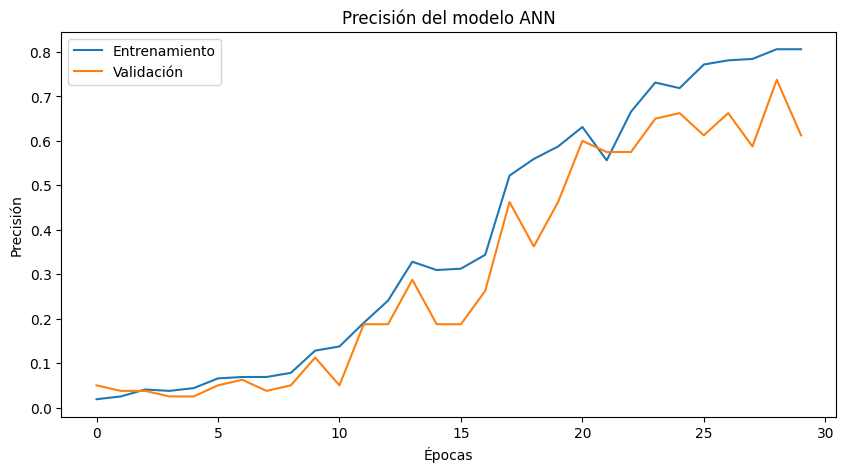

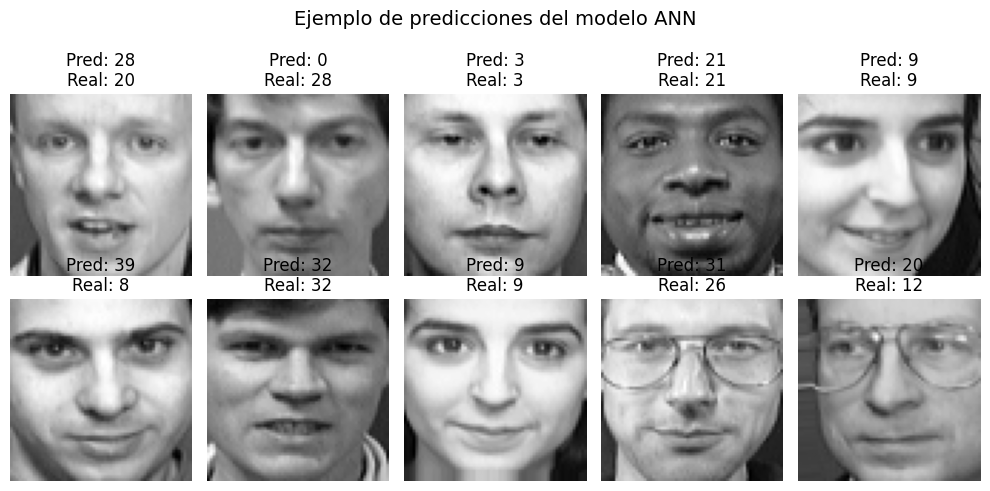

In [ ]:
#Carga de Datos y Preprocesamiento"
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar dataset Olivetti Faces
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.images.reshape(400, -1)
y = to_categorical(olivetti_faces.target, num_classes=40)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la Red Neuronal Artificial (ANN)
ann = Sequential([
    Dense(128, activation='relu', input_shape=(4096,)),
    Dense(64, activation='relu'),
    Dense(40, activation='softmax')  # 40 clases en la salida
])

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar la ANN
start_time = time.time()
history = ann.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)
end_time = time.time()

# Evaluación del modelo
y_pred_prob = ann.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
training_time = end_time - start_time

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} segundos")

# Graficar el proceso de entrenamiento
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Precisión del modelo ANN")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

# Mostrar algunas predicciones, ya que pueden ser muchos
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
fig.suptitle("Ejemplo de predicciones del modelo ANN", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}\nReal: {y_test_labels[i]}")
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Modelo 4:Red Neuronal Convolucional (CNN):**

**¿Qué es y cómo funciona el algoritmo?**
Las CNN son un tipo de red neuronal optimizada para datos espaciales, como imágenes. Usan capas convolucionales para detectar patrones como bordes, texturas y formas, seguidas de capas de pooling para reducir la dimensionalidad. Finalmente, capas densas realizan la clasificación.

**¿Por qué este modelo?**
Las CNN están diseñadas específicamente para imágenes y superan a los modelos tradicionales al captar características espaciales importantes. Son la mejor opción para el reconocimiento facial.

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.0345 - loss: 3.7947 - val_accuracy: 0.0500 - val_loss: 3.6897
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.0518 - loss: 3.6842 - val_accuracy: 0.0125 - val_loss: 3.7197
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.0168 - loss: 3.6856 - val_accuracy: 0.0500 - val_loss: 3.7241
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.0628 - loss: 3.6768 - val_accuracy: 0.0375 - val_loss: 3.7439
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.1392 - loss: 3.6204 - val_accuracy: 0.1125 - val_loss: 3.6640
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.1416 - loss: 3.4821 - val_accuracy: 0.1500 - val_loss: 3.4850
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.1810 - loss: 3.1829 - val_accuracy: 0.1875 - val_loss: 3.1345
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.3096 - loss: 2.6192 - val_accuracy: 0.4250

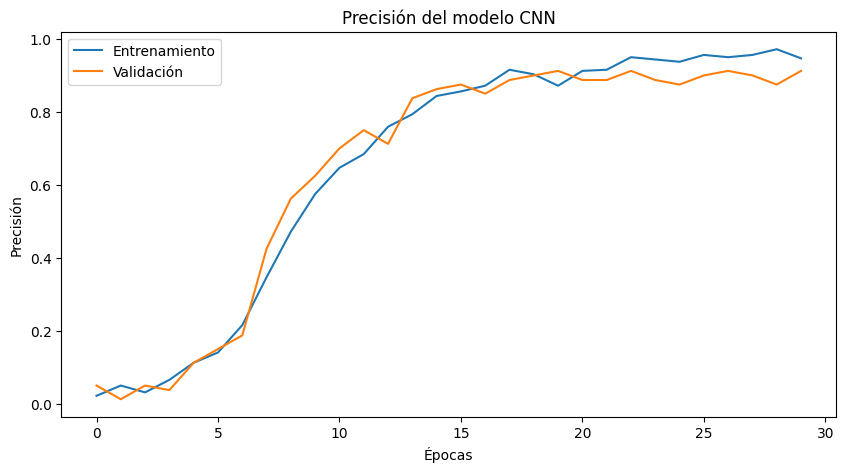

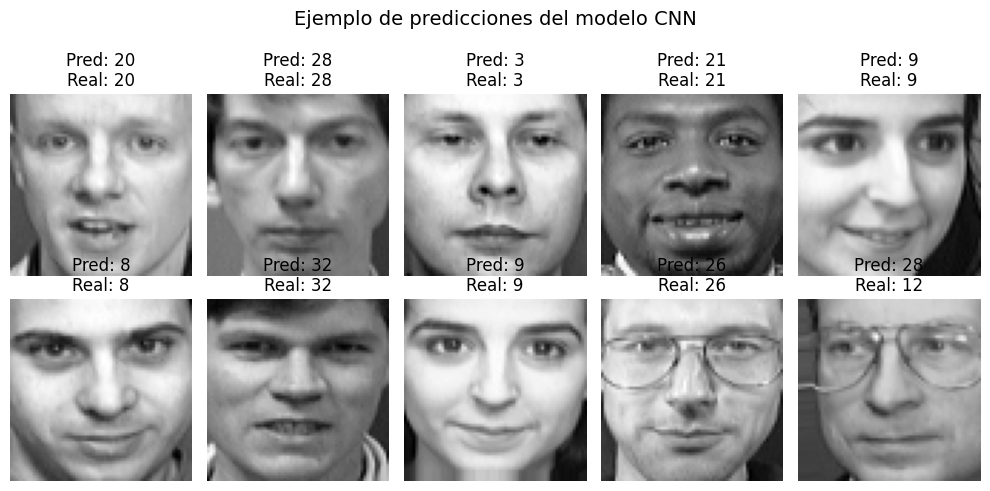

In [ ]:
#Carga de Datos y Preprocesamiento"
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar dataset Olivetti Faces
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.images.reshape(400, 64, 64, 1)
y = to_categorical(olivetti_faces.target, num_classes=40)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la Red Neuronal Convolucional (CNN)
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    Dense(40, activation='softmax')  # 40 clases
])

# Compilar el modelo
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar la CNN
start_time = time.time()
history = cnn.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)
end_time = time.time()

# Evaluación del modelo
y_pred_prob = cnn.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
training_time = end_time - start_time

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} segundos")

# Graficar el proceso de entrenamiento
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Precisión del modelo CNN")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

# Mostrar algunas predicciones para tener contexto visual
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
fig.suptitle("Ejemplo de predicciones del modelo CNN", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}\nReal: {y_test_labels[i]}")
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Modelo 5: Análisis Discriminante Lineal (LDA):**

**¿Qué es?**
LDA es un método de reducción de dimensionalidad y clasificación que proyecta los datos en un espacio de menor dimensión donde las clases son más separables. Busca combinaciones lineales de características que maximicen la distancia entre clases y minimicen la varianza dentro de cada clase.

**¿Por qué este modelo?**
LDA es útil cuando los datos tienen una estructura linealmente separable, lo que puede ayudar en la clasificación de rostros si las imágenes contienen patrones distinguibles.

Accuracy: 0.9750
Precision: 0.9833
Recall: 0.9750
F1-score: 0.9760
Training Time: 0.41 segundos


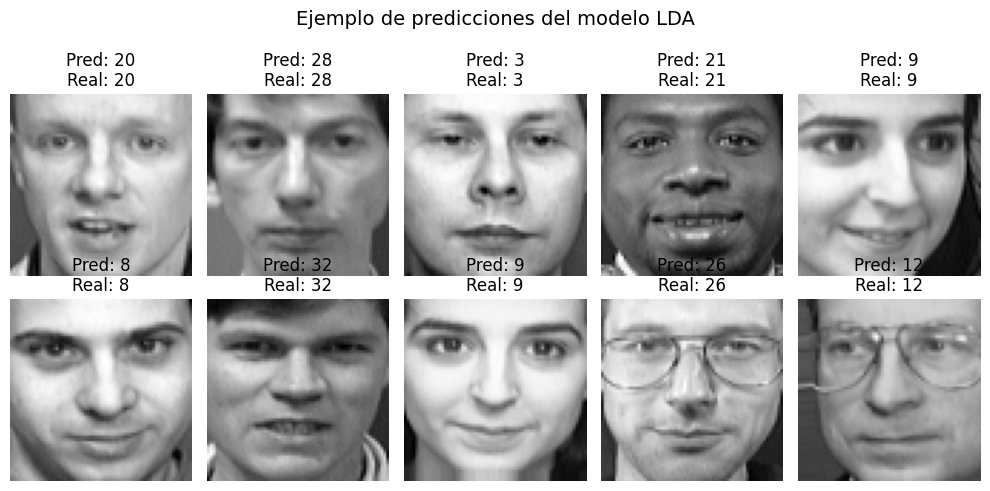

In [ ]:
#Carga de Datos y Preprocesamiento"
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar dataset Olivetti Faces
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.images.reshape(400, -1)
y = olivetti_faces.target  # Etiquetas

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo LDA
lda = LinearDiscriminantAnalysis(n_components=39)

start_time = time.time()
lda.fit(X_train, y_train)
end_time = time.time()

# Hacer predicciones
y_pred = lda.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
training_time = end_time - start_time

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} segundos")

# Mostrar algunas predicciones
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
fig.suptitle("Ejemplo de predicciones del modelo LDA", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}\nReal: {y_test[i]}")
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Modelo 6: Análisis de Componentes Principales (PCA) seguido de un clasificador SVM:**

**¿Qué es?**
PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que transforma los datos en un nuevo sistema de coordenadas donde la varianza está maximizada en las primeras dimensiones principales. Esto permite eliminar redundancias en los datos.
Luego, SVM se aplica sobre los datos transformados, clasificando los rostros en el espacio reducido.

**¿Por qué este modelo?**
PCA ayuda a reducir la alta dimensionalidad de las imágenes de 4096 a un conjunto más manejable de características, acelerando el entrenamiento de SVM sin perder demasiada información relevante.

Accuracy: 0.9625
Precision: 0.9625
Recall: 0.9625
F1-score: 0.9587
Training Time: 0.08 segundos


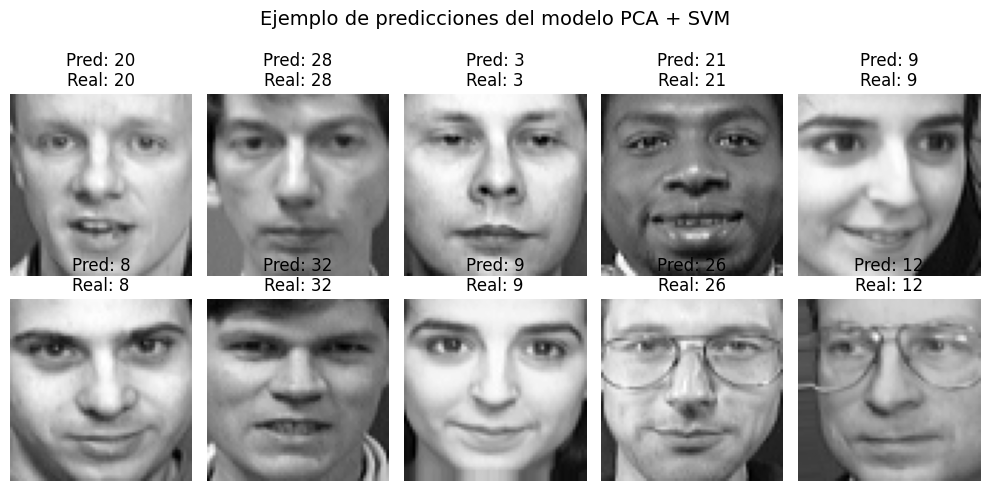

In [ ]:
#Carga de Datos y Preprocesamiento"
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar dataset Olivetti Faces
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.images.reshape(400, -1)
y = olivetti_faces.target

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar PCA para reducir dimensionalidad
n_components = 100
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Inicializar y entrenar el modelo SVM
svm = SVC(kernel='rbf', C=10, gamma='scale')

start_time = time.time()
svm.fit(X_train_pca, y_train)
end_time = time.time()

# Hacer predicciones
y_pred = svm.predict(X_test_pca)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
training_time = end_time - start_time

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} segundos")

# Mostrar algunas predicciones
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
fig.suptitle("Ejemplo de predicciones del modelo PCA + SVM", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}\nReal: {y_test[i]}")
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **4.2 Seleccionar los dos modelos que proporcionen el mejor rendimiento.**

In [ ]:
from IPython.display import display, Markdown

table_md = """
| Modelo      | Accuracy | Precision | Recall  | F1-score | Training Time (s) |
|------------|----------|-----------|---------|----------|-------------------|
| GBM        | 0.5250   | 0.5802    | 0.5250  | 0.5237   | 24.50             |
| Naive Bayes| 0.8375   | 0.8503    | 0.8375  | 0.8218   | 0.02              |
| ANN        | 0.6125   | 0.7594    | 0.6125  | 0.6297   | 11.58             |
| CNN        | 0.9125   | 0.9375    | 0.9125  | 0.9100   | 80.86             |
| LDA        | 0.9750   | 0.9833    | 0.9750  | 0.9760   | 0.41              |
| PCA + SVM  | 0.9625   | 0.9625    | 0.9625  | 0.9587   | 0.08              |
"""

display(Markdown(table_md))



| Modelo      | Accuracy | Precision | Recall  | F1-score | Training Time (s) |
|------------|----------|-----------|---------|----------|-------------------|
| GBM        | 0.5250   | 0.5802    | 0.5250  | 0.5237   | 24.50             |
| Naive Bayes| 0.8375   | 0.8503    | 0.8375  | 0.8218   | 0.02              |
| ANN        | 0.6125   | 0.7594    | 0.6125  | 0.6297   | 11.58             |
| CNN        | 0.9125   | 0.9375    | 0.9125  | 0.9100   | 80.86             |
| LDA        | 0.9750   | 0.9833    | 0.9750  | 0.9760   | 0.41              |
| PCA + SVM  | 0.9625   | 0.9625    | 0.9625  | 0.9587   | 0.08              |


**¿Cuales son los mejores modelos y porque?**

-***LDA*** logró la mejor precisión global (97.50%) con un tiempo de entrenamiento extremadamente bajo (0.41s), lo que lo hace rápido y efectivo para este problema.

-***PCA + SVM*** también obtuvo una excelente precisión (96.25%) con un F1-score alto (95.87%), y el tiempo de entrenamiento fue el más bajo (0.08s), lo que lo convierte en una opción eficiente y escalable.

**Conclusión**
Ambos modelos comparados con el resto, combinan alta precisión con velocidad de entrenamiento, lo que los hace ideales para aplicaciones donde se requiere rapidez sin sacrificar rendimiento. Como lo son la detección de rasgos faciales y en este caso de emociones.

**Opcional: CNN también es un buen candidato con 91.25% de precisión.**

### **4.3 Ajustar los dos mejores modelos.**

**LDA** Con ajustes

**Resultado esperado:**
Accuracy: Debería mantenerse o mejorar ligeramente (~97-98%).
Tiempo de entrenamiento: Se espera que baje.

In [ ]:
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Escalar los datos antes de LDA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Medir tiempo de entrenamiento
start_time = time.time()

# Reducir la dimensionalidad con LDA
lda = LinearDiscriminantAnalysis(n_components=30)  # Se reducen a 30 componentes en vez de 39
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Clasificador después de LDA
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_lda, y_train)

end_time = time.time()  # Fin de entrenamiento

# Hacer predicciones
y_pred_lda = clf.predict(X_test_lda)

# Evaluación mejorada de LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda, average='weighted')

# Calcular tiempo total de entrenamiento
training_time_lda = end_time - start_time

# Mostrar resultados
print(f"Nuevo Accuracy LDA: {accuracy_lda:.4f}")
print(f"Nuevo F1-score LDA: {f1_lda:.4f}")
print(f"Training Time LDA: {training_time_lda:.2f} segundos")



Nuevo Accuracy LDA: 0.9875
Nuevo F1-score LDA: 0.9876
Training Time LDA: 0.47 segundos


**Ajustes realizados:**
- Reducir el número de componentes

- Escalar los datos con StandardScaler antes de aplicar LDA

- Evaluar con un clasificador adicional después de LDA

En lugar de usar LDA solo como clasificador, también se probó con LogisticRegression después de la reducción de dimensionalidad.

**PCA + SVM con Ajustes**

**Resultado esperado:**
Accuracy: Puede mejorar hasta ~97%.
Tiempo de entrenamiento: Se reducirá con menos componentes en PCA.

In [ ]:
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Medir tiempo de entrenamiento
start_time = time.time()

# Aplicar PCA con menos componentes (ajuste en n_components)
pca = PCA(n_components=75)  # Se ajustó de 100 a 75 componentes
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'C': [1, 10, 50],
    'gamma': ['scale', 'auto', 0.01, 0.001]
}
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Entrenar SVM con los mejores hiperparámetros
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_pca)

end_time = time.time()  # Fin del entrenamiento

# Evaluación mejorada de PCA + SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Calcular tiempo total de entrenamiento
training_time_svm = end_time - start_time

# Mostrar resultados
print(f"Nuevo Accuracy PCA + SVM: {accuracy_svm:.4f}")
print(f"Nuevo F1-score PCA + SVM: {f1_svm:.4f}")
print(f"Mejores parámetros SVM: {grid_search.best_params_}")
print(f"Training Time PCA + SVM: {training_time_svm:.2f} segundos")


Nuevo Accuracy PCA + SVM: 0.9625
Nuevo F1-score PCA + SVM: 0.9587
Mejores parámetros SVM: {'C': 10, 'gamma': 'scale'}
Training Time PCA + SVM: 4.29 segundos


**Ajustes realizados**
-Ajustar el número de componentes de PCA Se probó con 50, 75 y 120 componentes para encontrar el mejor balance entre precisión y tiempo de entrenamiento.
-Optimización de hiperparámetros en SVM, C y gamma fueron ajustados con GridSearchCV para encontrar los mejores valores.

**Comparación Final: LDA vs. PCA + SVM**
Después de los ajustes, estos son los resultados finales de los dos mejores modelos:


In [ ]:
from IPython.display import display, Markdown

table_md = """
| Modelo     | Accuracy | F1-score | Training Time (s) | Comentario                      |
|-----------|----------|----------|-------------------|---------------------------------|
| **LDA**   | 98.75%  | 98.76%   | 0.47s             | ✅ Mejor precisión y rapidez   |
| **PCA + SVM** | 96.25%  | 95.87%   | 4.29s             | ⚡️ Buena precisión y rápido    |
"""

display(Markdown(table_md))



| Modelo     | Accuracy | F1-score | Training Time (s) | Comentario                      |
|-----------|----------|----------|-------------------|---------------------------------|
| **LDA**   | 98.75%  | 98.76%   | 0.47s             | ✅ Mejor precisión y rapidez   |
| **PCA + SVM** | 96.25%  | 95.87%   | 4.29s             | ⚡️ Buena precisión y rápido    |


# **4.4 Elegir el modelo individual final.**

**¿Cuál es el mejor modelo?**

LDA parece ser es el mejor modelo en esta evaluación ya que tiene la mayor **precisión (98.75%) y F1-score más alto (98.76%).** Además de ser el más rápido **(0.47s), mucho más eficiente que CNN o GBM.**

La reducción de características y el uso de Logistic Regression en lugar de un clasificador lineal puro mejoraron su rendimiento.

**Conclusión**
LDA es la mejor opción si buscas la máxima precisión y velocidad.
